# Afrobeats Recommender

# EDA

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
from sklearn.decomposition import PCA

from scipy import sparse
import plotly.express as px
import time

#### EDA with Jacks Playlist

In [25]:
ankita= pd.read_csv('../data/ankita.csv')
ankita.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,068HSvCf5MbQfhV4qqaelg,"Haan Main Galat (From ""Love Aaj Kal"")",Pritam,{'external_urls': {'spotify': 'https://open.sp...,1wRPtKGflJrBx9BmLsSwlU,84,"['desi pop', 'filmi', 'indian instrumental', '...","Haan Main Galat (From ""Love Aaj Kal"")",63,0.685,...,0,-5.656,1,0.0521,0.0997,0.01120,0.1010,0.893,117.979,ankita
1,2aHz87L2Z4a0ZEQ7vMlH8z,Badal Pe Paon Hai,Salim–Sulaiman,{'external_urls': {'spotify': 'https://open.sp...,6ohaQzKaXrobAL8paLSaxq,64,"['desi hip hop', 'desi pop', 'filmi', 'indian ...",Chak De India,56,0.649,...,9,-9.607,1,0.0373,0.0717,0.00232,0.0936,0.869,104.999,ankita


In [26]:
afrobeats = pd.read_csv('../data/afrobeats.csv')
afrobeats.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),51,0.544,...,1,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,45,0.793,...,11,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032,afrobeats


In [27]:
df = pd.concat([afrobeats, ankita])

In [28]:
df.reset_index(inplace=True, drop=True)

In [29]:
df.head()

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),51,0.544,...,1,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,45,0.793,...,11,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032,afrobeats
2,5YgyvTZmdkIfFOnj8ri8mZ,Pakurumo,WizKid,{'external_urls': {'spotify': 'https://open.sp...,3tVQdUvClmAT7URs9V3rsp,80,"['afro dancehall', 'afropop', 'azonto', 'niger...",Superstar,49,0.879,...,2,-5.412,1,0.0421,0.525,0.005760,0.268,0.967,119.990,afrobeats
3,2cWdhA4ZDBvYuHRKKIPT3k,The Matter (feat. Wizkid),Maleek Berry,{'external_urls': {'spotify': 'https://open.sp...,520qA5VGL9iI0SbmEnTVNg,60,"['afro dancehall', 'afropop', 'azontobeats', '...",The Matter (feat. Wizkid),48,0.697,...,2,-6.782,1,0.2710,0.224,0.000000,0.336,0.808,103.070,afrobeats
4,4voOsb8qpJ569JaMiGAyrl,Slow Down (feat. Wiz Kid),R2Bees,{'external_urls': {'spotify': 'https://open.sp...,0LFsP7WPfu5inz9a1amcE4,52,"['afro dancehall', 'afropop', 'azonto', 'azont...",Refuse to Be Broke: Da Revolution 2,53,0.520,...,6,-3.006,0,0.3890,0.116,0.000000,0.249,0.704,135.550,afrobeats


In [30]:
features = ['track_name','danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre']

In [31]:
df = df[features]

#### Quick clustering to see how the different genres seperate out 

In [32]:
X = df.drop(columns = ['track_name','genre'])


In [33]:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=10))
])

pipeline.fit(X)
df['cluster'] = pipeline.predict(X)

#### PCA

In [34]:
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [35]:
pipeline_pca.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

In [36]:
pca_df=pd.DataFrame(pipeline_pca.transform(X), columns=['x','y'])

In [37]:
pca_df['cluster'] = df['cluster']
pca_df['genre'] = df['genre']

<AxesSubplot:xlabel='x', ylabel='y'>

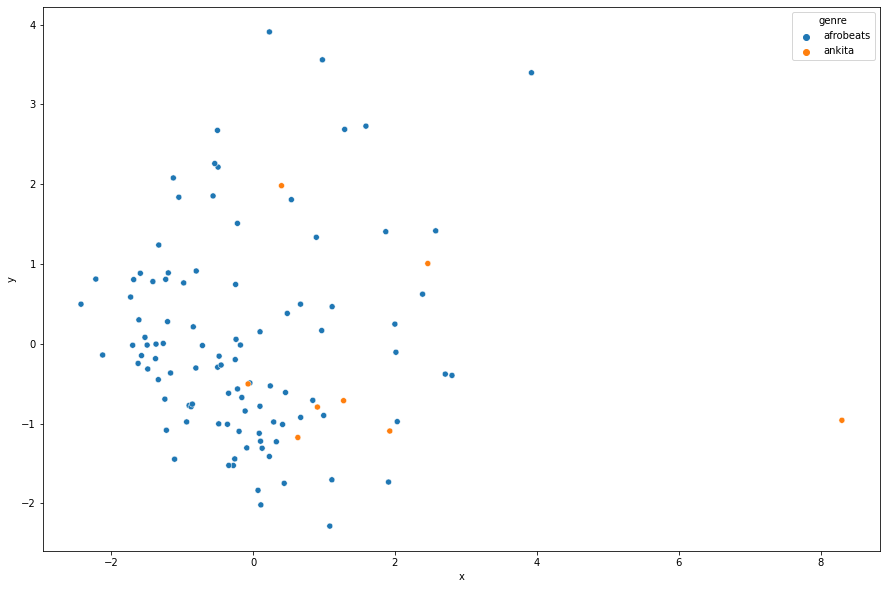

In [38]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=pca_df['x'], y=pca_df['y'], hue=pca_df['genre'])

#### Reduce the features into 2 dimentions for better visualization

In [39]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('tsne', TSNE(n_components=2, verbose=2))
])
X_tnse = pipeline.fit_transform(X)


tsne_df = pd.DataFrame(columns=['x', 'y'], data=X_tnse)
tsne_df['genre'] = df['genre']
tsne_df['cluster'] = df['cluster']
tsne_df['track_name'] = df['track_name']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 108 samples in 0.000s...
[t-SNE] Computed neighbors for 108 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 108 / 108
[t-SNE] Mean sigma: 1.642635
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 56.1181526, gradient norm = 0.4685664 (50 iterations in 0.041s)
[t-SNE] Iteration 100: error = 57.3699722, gradient norm = 0.4563939 (50 iterations in 0.027s)
[t-SNE] Iteration 150: error = 56.1114273, gradient norm = 0.5762463 (50 iterations in 0.025s)
[t-SNE] Iteration 200: error = 55.9987564, gradient norm = 0.4871204 (50 iterations in 0.020s)
[t-SNE] Iteration 250: error = 55.7386894, gradient norm = 0.5130076 (50 iterations in 0.023s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.738689
[t-SNE] Iteration 300: error = 0.8031639, gradient norm = 0.0093739 (50 iterations in 0.022s)
[t-SNE] Iteration 350: error = 0.5981008, gradient norm = 0.0041295 (

In [40]:
tsne_df.head()

,x,y,genre,cluster,track_name
0,3.567653,3.049119,afrobeats,5,Oleku (feat. Brymo)
1,-6.958162,-3.667003,afrobeats,8,Move Back
2,1.220036,-2.800478,afrobeats,7,Pakurumo
3,-5.576961,-1.362207,afrobeats,8,The Matter (feat. Wizkid)
4,4.597652,0.812338,afrobeats,6,Slow Down (feat. Wiz Kid)


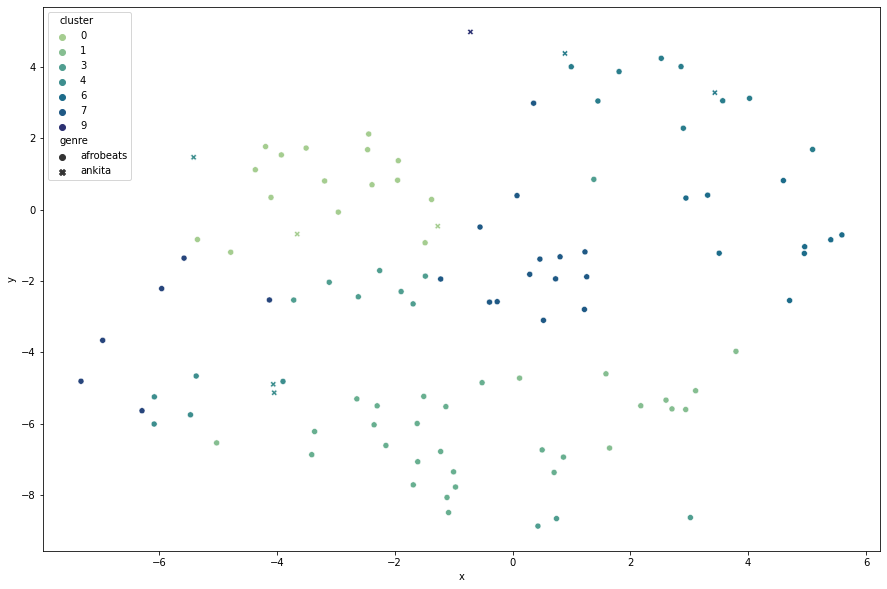

In [41]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=tsne_df['x'], y=tsne_df['y'], hue=tsne_df['cluster'],style=tsne_df['genre'], palette='crest');

#### This function gives the songs in each cluster

In [42]:
tsne_df[tsne_df['genre']=='ankita']

,x,y,genre,cluster,track_name
100,-1.269309,-0.465889,ankita,0,"Haan Main Galat (From ""Love Aaj Kal"")"
101,-3.656309,-0.687625,ankita,0,Badal Pe Paon Hai
102,-4.062261,-4.899125,ankita,4,Ziddi Dil
103,3.433677,3.276614,ankita,5,Dangal
104,-5.414459,1.464719,ankita,4,Pray For Me (with Kendrick Lamar)
105,0.889212,4.376725,ankita,5,Blinding Lights
106,-0.715433,4.979997,ankita,9,RAINY NIGHT IN TALLINN
107,-4.046116,-5.136509,ankita,4,Zinda


In [43]:
X.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [44]:
def get_song(df,title):
    cluster = df.loc[df['track_name'] == title, 'cluster'].iloc[0]
    lst=[]
    for i in range(len(df)):
        if df.loc[i]['cluster'] == cluster:
            lst.append(df.loc[i]['track_name'])
    return lst, cluster

## Cosine similarity

In [47]:
X.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.544,0.730,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112
1,0.793,0.734,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032
2,0.879,0.737,-5.412,1,0.0421,0.525,0.005760,0.268,0.967,119.990
3,0.697,0.841,-6.782,1,0.2710,0.224,0.000000,0.336,0.808,103.070
4,0.520,0.717,-3.006,0,0.3890,0.116,0.000000,0.249,0.704,135.550


In [58]:
similarities = cosine_similarity(X)

In [59]:
similarities

array([[1.        , 0.99885823, 0.99977449, ..., 0.9999434 , 0.99762504,
        0.99917263],
       [0.99885823, 1.        , 0.99953946, ..., 0.99917993, 0.99969244,
        0.99996123],
       [0.99977449, 0.99953946, 1.        , ..., 0.99990238, 0.99870536,
        0.99971158],
       ...,
       [0.9999434 , 0.99917993, 0.99990238, ..., 1.        , 0.99818375,
        0.99944682],
       [0.99762504, 0.99969244, 0.99870536, ..., 0.99818375, 1.        ,
        0.99954636],
       [0.99917263, 0.99996123, 0.99971158, ..., 0.99944682, 0.99954636,
        1.        ]])

In [65]:
recommender_df = pd.DataFrame(similarities,
                              columns=df['track_name'],
                             index=df['track_name'])

In [66]:
recommender_df

track_name,Oleku (feat. Brymo),Move Back,Pakurumo,The Matter (feat. Wizkid),Slow Down (feat. Wiz Kid),Like to Party,Yahooze,Bumper To Bumper,Dami Duro,Gongo Aso,...,Wololo,Yes/No,"Haan Main Galat (From ""Love Aaj Kal"")",Badal Pe Paon Hai,Ziddi Dil,Dangal,Pray For Me (with Kendrick Lamar),Blinding Lights,RAINY NIGHT IN TALLINN,Zinda
track_name,,,,,,,,,,,,,,,,,,,,,
Oleku (feat. Brymo),1.000000,0.998858,0.999774,0.999164,0.999987,0.999251,0.999216,0.998757,0.999778,0.999933,...,0.999700,0.999835,0.999726,0.997845,0.998789,0.999997,0.999672,0.999943,0.997625,0.999173
Move Back,0.998858,1.000000,0.999539,0.999910,0.998647,0.999889,0.999903,0.999984,0.997677,0.998740,...,0.999707,0.999473,0.999611,0.999785,0.999979,0.998952,0.999628,0.999180,0.999692,0.999961
Pakurumo,0.999774,0.999539,1.000000,0.999779,0.999683,0.999807,0.999798,0.999463,0.999186,0.999790,...,0.999937,0.999985,0.999988,0.998925,0.999490,0.999806,0.999962,0.999902,0.998705,0.999712
The Matter (feat. Wizkid),0.999164,0.999910,0.999779,1.000000,0.998992,0.999990,0.999992,0.999883,0.998159,0.999162,...,0.999825,0.999723,0.999832,0.999667,0.999897,0.999241,0.999844,0.999471,0.999511,0.999942
Slow Down (feat. Wiz Kid),0.999987,0.998647,0.999683,0.998992,1.000000,0.999085,0.999044,0.998533,0.999862,0.999933,...,0.999588,0.999752,0.999625,0.997558,0.998571,0.999974,0.999564,0.999894,0.997315,0.998990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dangal,0.999997,0.998952,0.999806,0.999241,0.999974,0.999327,0.999294,0.998861,0.999731,0.999926,...,0.999750,0.999865,0.999767,0.997979,0.998893,1.000000,0.999723,0.999962,0.997772,0.999257
Pray For Me (with Kendrick Lamar),0.999672,0.999628,0.999962,0.999844,0.999564,0.999875,0.999868,0.999591,0.998991,0.999675,...,0.999940,0.999960,0.999980,0.999106,0.999606,0.999723,1.000000,0.999870,0.998945,0.999788
Blinding Lights,0.999943,0.999180,0.999902,0.999471,0.999894,0.999547,0.999518,0.999110,0.999549,0.999905,...,0.999839,0.999954,0.999887,0.998365,0.999132,0.999962,0.999870,1.000000,0.998184,0.999447
